El objetivo de este notebook es plotear y analizar tiempos / spikes de experimentos. Por un lado cargamos un archivo donde se indica el tiempo de activación del láser, y por otro tenemos los spikes. Tenemos que plotear primero, de manera coordinada, la información de ambos archivos.

In [931]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
import datetime as dt
import os
import seaborn as sns


In [932]:
hoy = dt.date.today()

In [933]:
df_times = pd.read_csv('times_200msec.csv',sep=',', index_col='FileName')
df_times

,BlockVectorStartTime,ExperimentStartTime,AddedDate,ModifiedDate
FileName,,,,
D17_POSTsiembra_P1_A1_(I)(000),11:21:46:995,10:55:42:93,11:21:47:24,11:26:43:852
D17_POSTsiembra_P1_A1_(IV)(000),14:8:23:645,13:41:56:608,14:8:23:660,14:11:44:49
D17_POSTsiembra_P1_A2_(I)(000),11:27:49:572,11:27:17:897,11:27:49:741,11:31:11:279
D17_POSTsiembra_P1_A2_(IV)(000),14:4:15:673,13:41:56:608,14:4:15:699,14:7:40:61
D17_POSTsiembra_P1_A3_(I)(000),11:32:6:701,11:27:17:897,11:32:6:743,11:35:28:528
D17_POSTsiembra_P1_A3_(IV)(000),14:0:2:461,13:41:56:608,14:0:2:493,14:3:36:549
D17_POSTsiembra_P1_A4_(I)(000),11:36:31:795,11:35:39:764,11:36:31:823,11:39:52:762
D17_POSTsiembra_P1_A4_(IV)(000),13:45:50:580,13:41:56:608,13:45:50:604,13:49:16:780
D17_POSTsiembra_P1_A5_(I)(000),11:40:53:624,11:35:39:764,11:40:53:647,11:44:13:557


In [934]:
df_times.columns

Index([' BlockVectorStartTime', ' ExperimentStartTime', ' AddedDate',
       ' ModifiedDate'],
      dtype='object')

In [935]:
exp_date = '2024_04_22-23__200msec'

name_sample = 'D18_POSTsiembre_P1_C2_(I)(000)'
name_file_spikes = f'{name_sample}_spike_list.csv'
name_file_laser = '20240423_MEAs_C2_(I).csv'

column_time = ' AddedDate'

timestamp = [int(i) for i in df_times[column_time].loc[name_sample].split(':')]

time_absolute_start = dt.datetime.combine(hoy, dt.time(timestamp[0], timestamp[1], timestamp[2], timestamp[3] * 1000))  # A1_(IV)_(000)

time_window_seconds = 0.5         # We add a custom window to displace the times of the lasers, because we see that in some cases the laser start time is not correct

os.makedirs(f'../../results/{exp_date}/{column_time}', exist_ok=True)

In [936]:
df_spikes = pd.read_csv(f"../../spike_lists/{exp_date}/{name_file_spikes}", sep=None, encoding='unicode_escape') #Use sep=None to recognize the separator automatically, because in some files it is ; and in other it is \t
df_spikes['electrode_str'] = [i.split('_')[1] for i in df_spikes['Electrode']]
df_spikes['electrode_coord'] = [(int(electrode[0]) - 1, 3 - (int(electrode[1]) - 1)) for electrode in df_spikes['electrode_str']]
df_spikes

C:\Users\ane\AppData\Local\Temp\ipykernel_7196\4098853542.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_spikes = pd.read_csv(f"../../spike_lists/{exp_date}/{name_file_spikes}", sep=None, encoding='unicode_escape') #Use sep=None to recognize the separator automatically, because in some files it is ; and in other it is \t


,ï»¿Investigator,Unnamed: 1,Time (s),Electrode,Amplitude (mV),electrode_str,electrode_coord
0,Recording Name,D18_POSTsiembre_P1_C2_(I),0.01448,C2_23,0.087,23,"(1, 1)"
1,Description,NaN,0.25496,C2_23,0.090,23,"(1, 1)"
2,Maestro Edge (Maestro-091) Settings,NaN,0.52656,C2_41,0.011,41,"(3, 3)"
3,Original File Time,04/23/2024 12:02:57,0.65704,C2_23,0.091,23,"(1, 1)"
4,Sampling Frequency,12.5 kHz,1.54128,C2_23,0.097,23,"(1, 1)"
...,...,...,...,...,...,...,...
13911,NaN,NaN,207.78576,C2_33,0.068,33,"(2, 1)"
13912,NaN,NaN,207.78824,C2_33,0.032,33,"(2, 1)"
13913,NaN,NaN,207.78928,C2_23,0.018,23,"(1, 1)"
13914,NaN,NaN,207.82312,C2_33,0.043,33,"(2, 1)"


In [937]:
df_laser = pd.read_csv(f"../../tiempos_structura/{exp_date}/{name_file_laser}", index_col=0)

list_start_times, list_end_times = [], []


# Modify dates
for value_on, value_off in zip(df_laser['Turn ON Laser Time'].values, df_laser['Turn OFF Laser Time'].values):
    value_on, value_off = value_on.replace(':', '.'), value_off.replace(':', '.')
    tuple_on = (int(value_on.split('.')[0]), int(value_on.split('.')[1]), int(value_on.split('.')[2]), int(value_on.split('.')[3]))
    tuple_off = (int(value_off.split('.')[0]), int(value_off.split('.')[1]), int(value_off.split('.')[2]), int(value_off.split('.')[3]))

    list_start_times.append((dt.datetime.combine(hoy, dt.time(tuple_on[0], tuple_on[1], tuple_on[2], tuple_on[3]))  - time_absolute_start).total_seconds() + time_window_seconds)
    list_end_times.append((dt.datetime.combine(hoy, dt.time(tuple_off[0], tuple_off[1], tuple_off[2], tuple_off[3]))  - time_absolute_start).total_seconds() + time_window_seconds)


df_laser['start_times'], df_laser['end_times'] = list_start_times, list_end_times
df_laser['duration'] = df_laser['ON duration (ms)'] / 1000
df_laser



,Repetition,ON duration (ms),Laser Power (mW),Turn ON Laser Time,Turn OFF Laser Time,Turn ON Laser Time (ms),start_times,end_times,duration
0,1,200,0,12:03:00.322264,12:03:00.540091,0 days 00:00:00.217827,3.471264,3.689091,0.2
1,2,200,0,12:03:03.573869,12:03:03.780823,0 days 00:00:00.206954,6.722869,6.929823,0.2
2,3,200,0,12:03:06.813420,12:03:07.015430,0 days 00:00:00.202010,9.962420,10.164430,0.2
3,4,200,0,12:03:10.036466,12:03:10.242852,0 days 00:00:00.206386,13.185466,13.391852,0.2
4,5,200,0,12:03:13.289317,12:03:13.502508,0 days 00:00:00.213191,16.438317,16.651508,0.2
5,6,200,0,12:03:16.546775,12:03:16.753632,0 days 00:00:00.206857,19.695775,19.902632,0.2
6,7,200,0,12:03:19.785180,12:03:19.996894,0 days 00:00:00.211714,22.934180,23.145894,0.2
7,8,200,0,12:03:23.035237,12:03:23.245048,0 days 00:00:00.209811,26.184237,26.394048,0.2
8,9,200,0,12:03:26.278914,12:03:26.488236,0 days 00:00:00.209322,29.427914,29.637236,0.2
9,10,200,0,12:03:29.554149,12:03:29.775210,0 days 00:00:00.221061,32.703149,32.924210,0.2


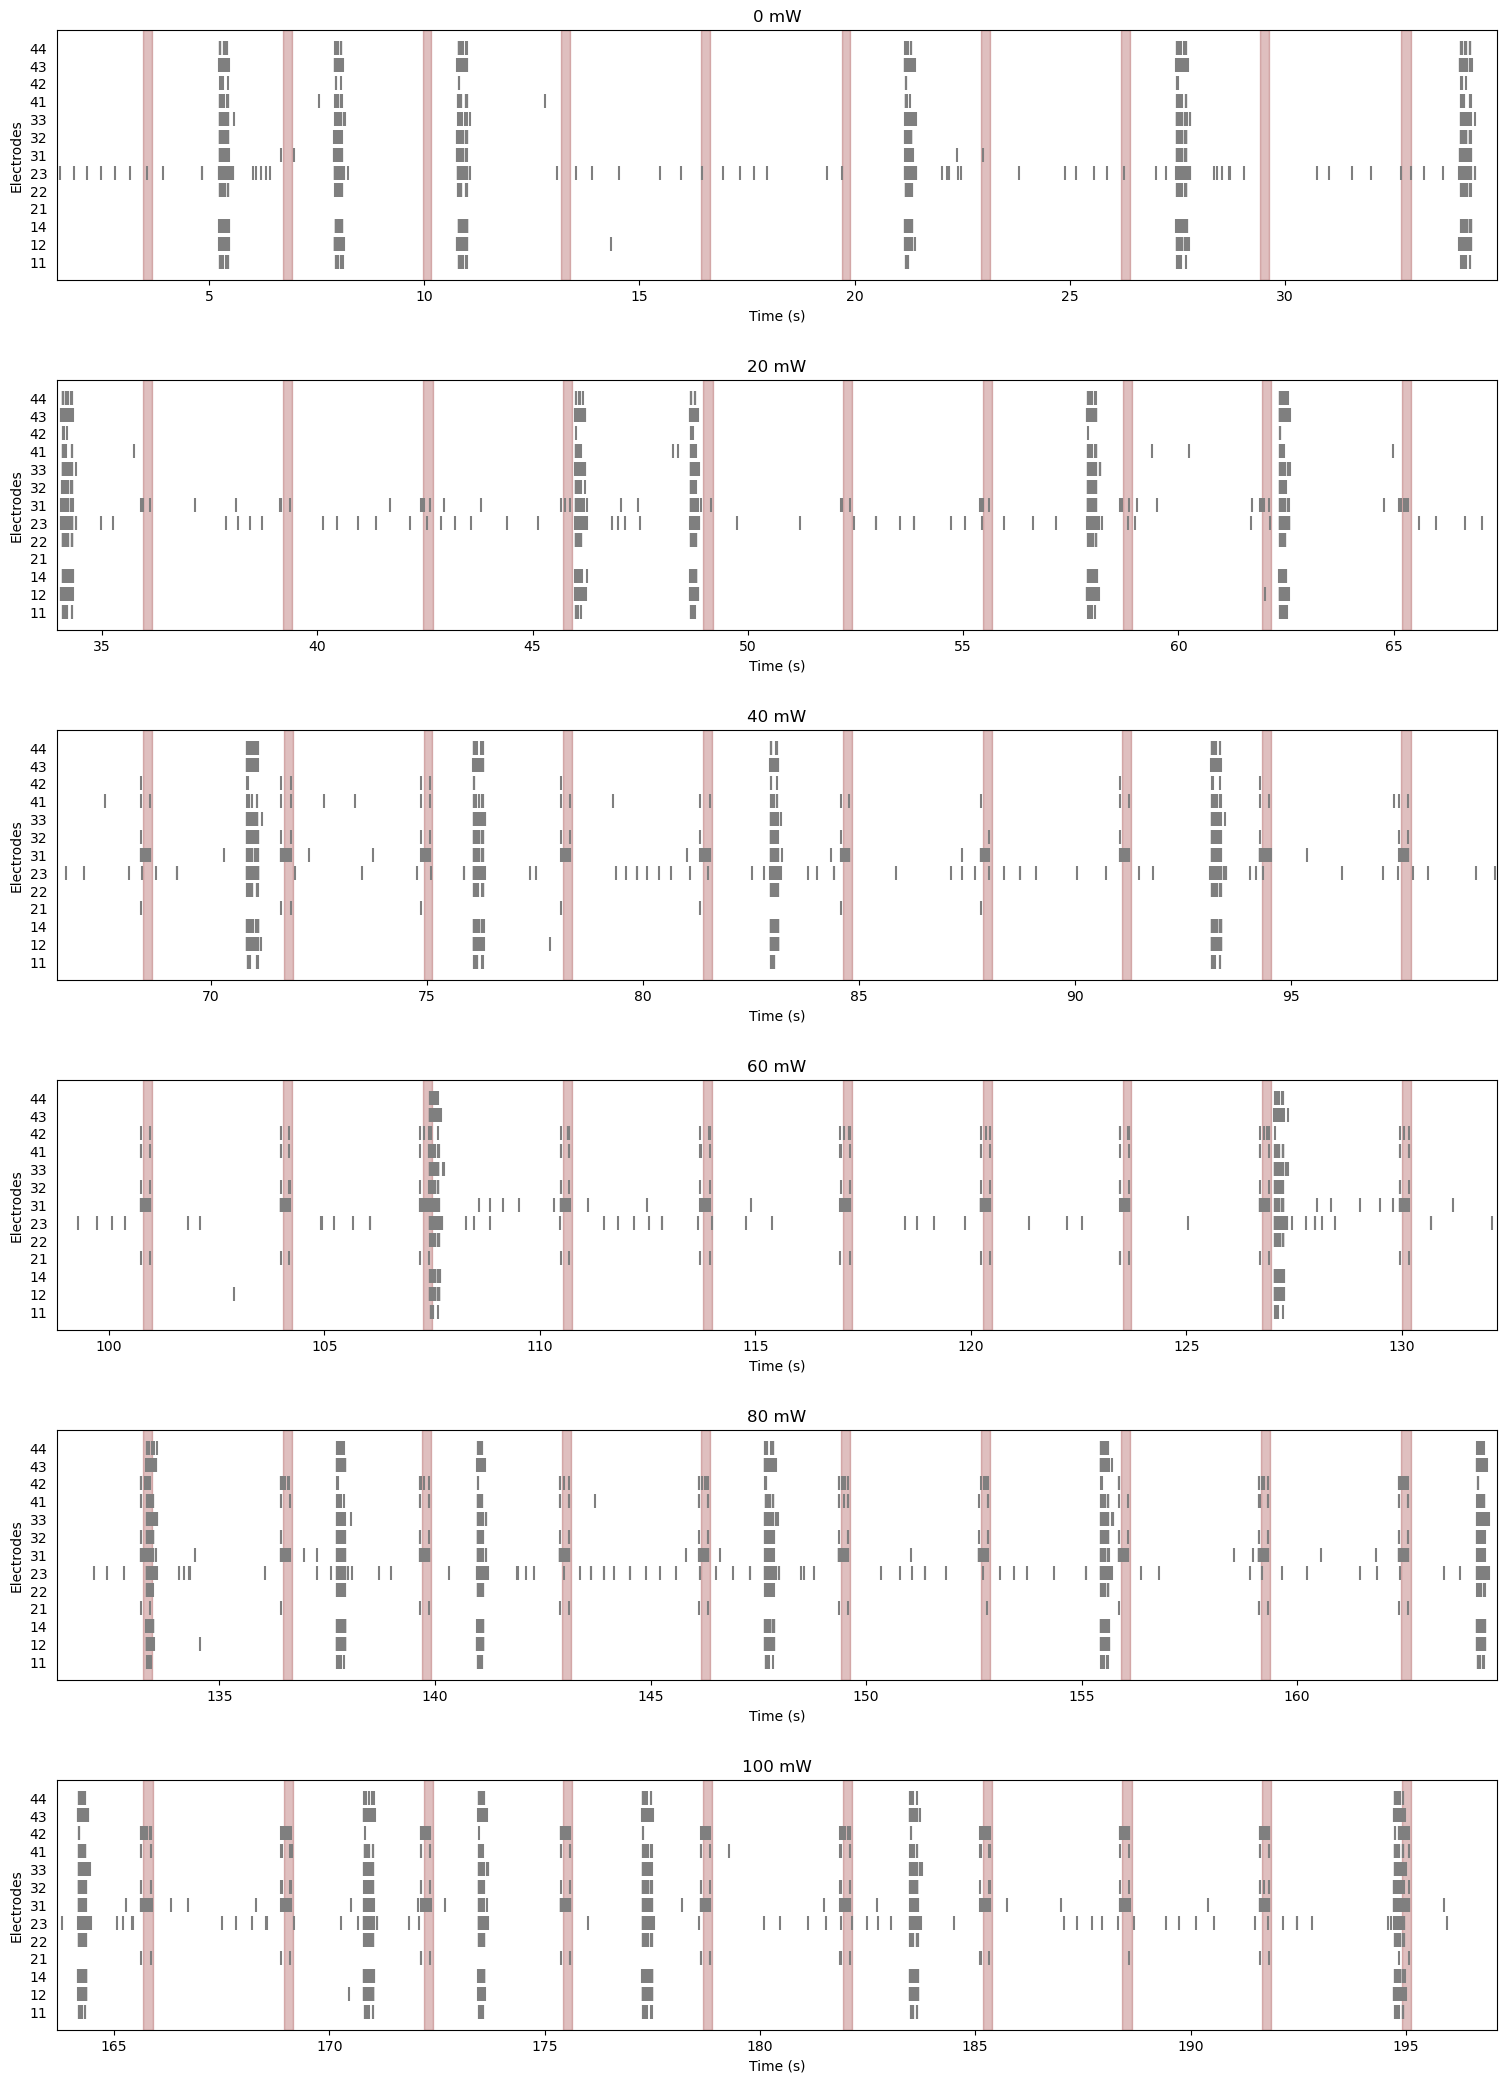

In [938]:
voltages = sorted(set(df_laser['Laser Power (mW)'].values))
electrodes = sorted(set(df_spikes['electrode_str'].values))

window = 2

fig, axs = plt.subplots(len(voltages), 1, figsize=(18, 25))


for idx, voltage in enumerate(voltages):
    df_laser_sub = df_laser[df_laser['Laser Power (mW)'] == voltage]
    t_0, t_f = min(df_laser_sub['start_times']), max(df_laser_sub['end_times'])


    for rep, start, end in zip(df_laser_sub['Repetition'].values, df_laser_sub['start_times'].values, df_laser_sub['end_times'].values):
        axs[idx].add_patch(mpl.patches.Rectangle((start, -1), end - start, len(electrodes)+1, alpha=0.25, color='#800000'))

    for electrode_idx, electrode in enumerate(electrodes):
        df_spikes_sub = df_spikes[(df_spikes['Time (s)'] > t_0 - window) & (df_spikes['Time (s)'] < t_f + window) & (df_spikes['electrode_str'] == electrode)]
        axs[idx].scatter(x=df_spikes_sub['Time (s)'].values, y=[electrode_idx] * len(df_spikes_sub), marker='|', s=100, c='#7f7f7f')
    


    axs[idx].set_yticks(np.array(range(len(electrodes))))
    axs[idx].set_yticklabels(electrodes)
    axs[idx].set_ylim([-1, len(electrodes)])
    axs[idx].set_xlim([t_0 - window, t_f+window])
    axs[idx].tick_params(left = False)
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Electrodes')

    axs[0].title.set_text('0 mW')
    axs[1].title.set_text('20 mW')
    axs[2].title.set_text('40 mW')
    axs[3].title.set_text('60 mW')
    axs[4].title.set_text('80 mW')
    axs[5].title.set_text('100 mW')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.savefig(f'../../results/{exp_date}/{column_time}/{name_sample}_spikeplot.png', dpi=300)

# Calculating the mean representation time between pulses

In [939]:
tw = 0.1
cutoff_counts = 60

time_ranges = np.arange(np.min(df_laser['start_times']) , np.max(df_laser['end_times']) , tw)
time_ranges_mean = (time_ranges[1:] + time_ranges[:-1]) * 0.5 

counts = np.array([len(df_spikes[(df_spikes['Time (s)'] >= start) & (df_spikes['Time (s)'] < end)]) for start, end in zip(time_ranges[:-1], time_ranges[1: ])])
len(counts)


1916

c:\Users\ane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


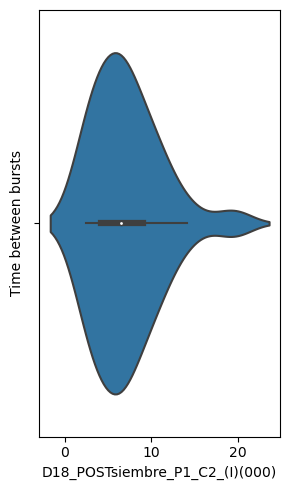

In [940]:
fig = plt.figure(figsize=(3,5))
tmps = np.argwhere(counts > cutoff_counts).flatten() * tw
diff = tmps[1: ] - tmps[: -1]
sns.violinplot(diff[diff > 3 * tw])
plt.xlabel(name_sample)
plt.ylabel('Time between bursts')
plt.tight_layout()

plt.savefig(f'../../results/{exp_date}/{column_time}/{name_sample}_distribution_interspike_gap_duration.png', dpi=300)

In [941]:
df_spikes

,ï»¿Investigator,Unnamed: 1,Time (s),Electrode,Amplitude (mV),electrode_str,electrode_coord
0,Recording Name,D18_POSTsiembre_P1_C2_(I),0.01448,C2_23,0.087,23,"(1, 1)"
1,Description,NaN,0.25496,C2_23,0.090,23,"(1, 1)"
2,Maestro Edge (Maestro-091) Settings,NaN,0.52656,C2_41,0.011,41,"(3, 3)"
3,Original File Time,04/23/2024 12:02:57,0.65704,C2_23,0.091,23,"(1, 1)"
4,Sampling Frequency,12.5 kHz,1.54128,C2_23,0.097,23,"(1, 1)"
...,...,...,...,...,...,...,...
13911,NaN,NaN,207.78576,C2_33,0.068,33,"(2, 1)"
13912,NaN,NaN,207.78824,C2_33,0.032,33,"(2, 1)"
13913,NaN,NaN,207.78928,C2_23,0.018,23,"(1, 1)"
13914,NaN,NaN,207.82312,C2_33,0.043,33,"(2, 1)"


# Calculating the mean firing rate

In [942]:
list_voltages_MFR, list_electrodes_MFR, list_MFR = [], [], []


for idx_vol, voltage in enumerate(voltages):
    for idx_elec, electrode in enumerate(electrodes):
        df_laser_sub = df_laser[df_laser['Laser Power (mW)'] == voltage]
        t_0, t_f = min(df_laser_sub['start_times']), max(df_laser_sub['end_times'])
        

        df_spikes_sub = df_spikes[(df_spikes['electrode_str'] == electrode) & (df_spikes['Time (s)'] > t_0) & (df_spikes['Time (s)'] < t_f)]
        MFR = len(df_spikes_sub) / (t_f - t_0)
        list_MFR.append(MFR)
        list_voltages_MFR.append(voltage)
        list_electrodes_MFR.append(electrode)

df_MFR = pd.DataFrame({'voltage': list_voltages_MFR, 'electrode': list_electrodes_MFR, 'MFR': list_MFR})

df_MFR.to_csv(f'../../results/{exp_date}/{column_time}/{name_sample}_MRF_raw.csv', sep=';', index=None)
df_MFR

,voltage,electrode,MFR
0,0,11,2.172958
1,0,12,9.914119
2,0,14,8.080686
3,0,21,0.000000
4,0,22,4.447772
...,...,...,...
73,100,33,4.992899
74,100,41,3.532391
75,100,42,5.638239
76,100,43,7.744088


In [943]:
df_MRF_pivot = df_MFR.pivot(index='electrode', columns='voltage', values='MFR')

df_MRF_pivot.to_csv(f'../../results/{exp_date}/{column_time}/{name_sample}_MRF_pivot.csv', sep=';')
df_MRF_pivot

voltage,0,20,40,60,80,100
electrode,,,,,,
11,2.172958,1.562555,1.568134,0.680187,1.938422,1.969987
12,9.914119,7.337216,8.624735,4.115131,9.318028,9.917866
14,8.080686,5.706724,7.158871,3.264897,7.889717,8.695116
21,0.000000,0.000000,0.238629,0.680187,0.578126,0.815167
22,4.447772,3.532734,3.408986,2.312635,4.454970,4.891003
23,11.883361,8.865803,10.261049,5.475504,11.460494,11.480270
31,6.858397,6.386096,17.522190,17.412784,22.716944,28.394988
32,5.737966,3.464797,5.420288,2.856785,6.597436,6.759094
33,4.753345,3.940357,3.920334,2.482682,4.522984,4.992899


In [944]:
df_MRF_pivot_norm = df_MRF_pivot.copy()
for voltage in voltages[1:]:
    df_MRF_pivot_norm[voltage] /= df_MRF_pivot_norm[voltages[0]]

df_MRF_pivot_norm = df_MRF_pivot_norm.iloc[:, 1:] * 100

df_MRF_pivot_norm.to_csv(f'../../results/{exp_date}/{column_time}/{name_sample}_MRF_pivot_norm.csv', sep=';')
df_MRF_pivot_norm

voltage,20,40,60,80,100
electrode,,,,,
11,71.909152,72.165872,31.302355,89.206616,90.659259
12,74.007751,86.994475,41.507781,93.987456,100.037803
14,70.621775,88.592374,40.403712,97.636726,107.603688
21,NaN,inf,inf,inf,inf
22,79.427035,76.644802,51.995363,100.161814,109.965219
23,74.606861,86.348034,46.077067,96.441518,96.607936
31,93.113529,255.485204,253.889994,331.228177,414.017840
32,60.383707,94.463585,49.787415,114.978650,117.795993
33,82.896513,82.475282,52.230216,95.153723,105.039694


In [945]:
df_MFR_summary = pd.DataFrame({'voltage': voltages, 
                               'sum': df_MFR.groupby('voltage').sum()['MFR'].values, 
                               'mean': df_MFR.groupby('voltage').mean()['MFR'].values, 
                               'median': df_MFR.groupby('voltage').median()['MFR'].values, 
                               'std': df_MFR.groupby('voltage').std()['MFR'].values})

df_MFR_summary.to_csv(f'../../results/{exp_date}/{column_time}/{name_sample}_MRF_summary.csv', sep=';', index=None)
df_MFR_summary

,voltage,sum,mean,median,std
0,0,66.648681,5.126822,4.753345,3.670610
1,20,50.511299,3.885485,3.532734,2.811351
2,40,68.929704,5.302285,3.920334,4.823959
3,60,47.068932,3.620687,2.482682,4.377299
4,80,84.712435,6.516341,4.522984,5.840642
5,100,96.902990,7.454076,5.638239,7.055326
